In [3]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns      

import warnings
warnings.filterwarnings('ignore')

In [4]:
match_data = pd.read_csv('./data/agg_match_stats_1.csv')
kill_data = pd.read_csv('./data/kill_match_stats_final_1.csv')

display(match_data.head(5))
display(kill_data.head(5))

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,2082.823000,0,0,fuckeddup,661.491,100001,50
1,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,1118.815000,0,0,nojiongegg,741.359,100002,47
2,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,25.533026,73,0,Darthmoca,83.255,100006,97
3,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,997.51000,1032.667850,345,3,gk1715,1144.816,100007,30
4,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,4296.35938,2300.323490,449,4,Angeliaboby,1112.843,100021,32


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,SCAR-L,854545656,1.0,366716.6,302736.6,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1059,SmileyRiley,32.0,366591.3,302851.8
1,AKM,chane_e,57.0,436041.6,276913.3,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,109,bonesaw53,85.0,434867.2,276258.3
2,Hit by Car,LY0629,42.0,265942.7,404094.2,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,624,Robi256,44.0,265409.5,403900.4
3,SKS,Supramida,6.0,339174.6,258929.0,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1450,Senorbotches,14.0,331995.5,253868.1
4,M416,scopionzy,3.0,289848.4,290939.0,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1296,lukesteeler,24.0,290196.1,291358.5


| 영어 컬럼명                  | 한국어 번역      | 의미 설명                            |
| ----------------------- | ----------- | -------------------------------- |
| **date**                | 경기 날짜       | 경기가 진행된 날짜 및 시간                  |
| **game_size**           | 게임 참가 인원 수  | 한 경기의 총 플레이어 수 (예: 100명)         |
| **match_id**            | 경기 ID       | 각 경기를 구분하는 고유 식별자                |
| **match_mode**          | 경기 모드       | 솔로 / 듀오 / 스쿼드 등 경기 방식            |
| **party_size**          | 파티(팀) 인원 수  | 함께 플레이한 팀원 수 (1=솔로, 2=듀오, 4=스쿼드) |
| **player_assists**      | 어시스트 수      | 적 처치에 기여한 횟수                     |
| **player_dbno**         | 다운(DOWN) 횟수 | 적을 기절시킨 횟수 (최종 킬은 아님)            |
| **player_dist_ride**    | 차량 이동 거리    | 차량으로 이동한 거리 (단위: 미터)             |
| **player_dist_walk**    | 도보 이동 거리    | 걸어서 이동한 거리 (단위: 미터)              |
| **player_dmg**          | 피해량(Damage) | 적에게 가한 총 피해량                     |
| **player_kills**        | 킬 수         | 최종적으로 적을 처치한 횟수                  |
| **player_name**         | 플레이어 이름     | 플레이어의 닉네임 또는 ID                  |
| **player_survive_time** | 생존 시간       | 플레이어가 생존한 총 시간 (초 단위)            |
| **team_id**             | 팀 ID        | 한 경기 내에서 팀을 구분하는 번호              |
| **team_placement**      | 팀 순위        | 경기 종료 시 팀의 최종 순위 (1위=우승)         |



| 영어 컬럼명                | 한국어 번역     | 의미 설명                                 |
| --------------------- | ---------- | ------------------------------------- |
| **killed_by**         | 처치 수단      | 킬이 발생한 원인 (무기 이름, 폭발, 낙사 등)           |
| **killer_name**       | 킬한 플레이어 이름 | 상대를 죽인 사람의 닉네임                        |
| **killer_placement**  | 킬러의 순위     | 킬을 한 플레이어의 최종 경기 순위 (1위=우승)           |
| **killer_position_x** | 킬러 위치 X좌표  | 킬 발생 시 킬러의 지도상 X좌표                    |
| **killer_position_y** | 킬러 위치 Y좌표  | 킬 발생 시 킬러의 지도상 Y좌표                    |
| **map**               | 맵 이름       | 경기가 진행된 지도 이름 (예: Erangel, Miramar 등) |
| **match_id**          | 경기 ID      | 해당 킬이 발생한 경기 식별자                      |
| **time**              | 발생 시각      | 킬이 일어난 시점 (단위: 초)                     |
| **victim_name**       | 희생자 이름     | 사망한 플레이어의 닉네임                         |
| **victim_placement**  | 희생자 순위     | 사망한 플레이어의 최종 경기 순위                    |
| **victim_position_x** | 희생자 위치 X좌표 | 사망 시 희생자의 지도상 X좌표                     |
| **victim_position_y** | 희생자 위치 Y좌표 | 사망 시 희생자의 지도상 Y좌표                     |


In [5]:
stats_data = pd.read_csv('./data/average_stats_40_without_error.csv')

display(stats_data.head())
display(stats_data.shape)
display(stats_data.info())

,player_name,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_placement
0,0--kxxk--0,0.205479,0.452055,1270.294181,1241.382246,79.904110,0.506849,862.592630,17.602740
1,0-0-Bram,0.245902,0.661202,1168.960602,1889.552056,128.519126,0.726776,955.282973,18.191257
2,0-0JiangNan,0.061224,0.000000,858.021240,1110.490982,86.000000,0.591837,706.339673,44.857143
3,0-0PenGzF,0.234043,1.000000,1024.378130,1270.576182,201.170213,1.574468,712.269702,28.340426
4,0-0TAT,0.073171,0.219512,910.634366,974.621348,127.146341,1.048780,628.614902,41.512195


(307559, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307559 entries, 0 to 307558
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_name          307559 non-null  object 
 1   player_assists       307559 non-null  float64
 2   player_dbno          307559 non-null  float64
 3   player_dist_ride     307559 non-null  float64
 4   player_dist_walk     307559 non-null  float64
 5   player_dmg           307559 non-null  float64
 6   player_kills         307559 non-null  float64
 7   player_survive_time  307559 non-null  float64
 8   team_placement       307559 non-null  float64
dtypes: float64(8), object(1)
memory usage: 21.1+ MB


None

| 영어 컬럼명                | 한국어 번역   | 의미 설명                                      |
| --------------------- | -------- | ------------------------------------------ |
| `player_name`         | 플레이어 이름  | 플레이어의 닉네임 또는 ID                            |
| `player_assists`      | 어시스트 수   | 적을 처치할 때 도움을 준 횟수                          |
| `player_dbno`         | 다운시킨 횟수  | 적을 **기절(DOWN)**시킨 횟수 (PUBG 등에서 "Knock" 개념) |
| `player_dist_ride`    | 차량 이동 거리 | 차량, 오토바이 등 탈것으로 이동한 거리 (단위: m)             |
| `player_dist_walk`    | 도보 이동 거리 | 걸어서 이동한 거리 (단위: m)                         |
| `player_dmg`          | 가한 피해량   | 적에게 입힌 총 피해량 (Damage)                      |
| `player_kills`        | 킬 수      | 적을 최종적으로 처치한 횟수                            |
| `player_survive_time` | 생존 시간    | 한 판에서 생존한 시간 (단위: 초 또는 분)                  |
| `team_placement`      | 팀 순위     | 게임 종료 시 팀이 기록한 최종 순위 (1위 = 우승)             |


In [6]:
player_data = pd.read_csv('./data/player_counts_40.csv')

display(player_data.head())
display(player_data.shape)
display(player_data.info())

,player_name,count
0,VanThang,1675
1,JZalan,1399
2,coolcarey,1394
3,Matthew_wang,1373
4,Slh_Bunny,1324


(307559, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307559 entries, 0 to 307558
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   player_name  307559 non-null  object
 1   count        307559 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ MB


None

# 본격 담당 업무 시작

In [7]:
kill_data_0 = pd.read_csv('./data/kill_match_stats_final_0.csv')
kill_data_1 = pd.read_csv('./data/kill_match_stats_final_1.csv')
kill_data_2 = pd.read_csv('./data/kill_match_stats_final_2.csv')
kill_data_3 = pd.read_csv('./data/kill_match_stats_final_3.csv')
kill_data_4 = pd.read_csv('./data/kill_match_stats_final_4.csv')

In [8]:
# 데이터 모두 합치기
kill_list = [kill_data_0, kill_data_1, kill_data_2, kill_data_3, kill_data_4]
kill_data = pd.concat(kill_list, axis=0, ignore_index=True)
print("합쳐진 데이터 크기:", kill_data.shape)
display(kill_data.head())

합쳐진 데이터 크기: (65370475, 12)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


In [9]:
# 경기수 40 이상인 선수들만 추출
kill_data_over40 = kill_data[kill_data['killer_name'].isin(player_data['player_name'])]
print("40경기 이상 플레이어의 킬 데이터 크기:", kill_data_over40.shape)
display(kill_data_over40.head())

40경기 이상 플레이어의 킬 데이터 크기: (21759452, 12)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
8,S686,Jingchita,40.0,370990.60,424074.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,OmGiTzPauly,47.0,370761.10,423662.1
14,Down and Out,UrGrandFather,14.0,535680.80,368517.3,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,751,Pis22,NaN,533947.60,366812.6
17,M416,PPPIGFEET,26.0,363133.90,430829.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,229,Northidaho,30.0,363109.90,430999.2


In [10]:
# map의 고유값 추출
kill_data_over40['map'].unique()
kill_data_over40['map'].value_counts()

map
ERANGEL    18798839
MIRAMAR     2633358
Name: count, dtype: int64

In [11]:
# 맵을 기준으로 데이터프레임을 2개로 분리
map1_kill_data_over40 = kill_data_over40[kill_data_over40['map'] == 'ERANGEL']
map2_kill_data_over40 = kill_data_over40[kill_data_over40['map'] == 'MIRAMAR']
print("ERANGEL 맵의 데이터 크기:", map1_kill_data_over40.shape)
print("MIRAMAR 맵의 데이터 크기:", map2_kill_data_over40.shape)

ERANGEL 맵의 데이터 크기: (18798839, 12)
MIRAMAR 맵의 데이터 크기: (2633358, 12)


In [12]:
# 2분30초 내에 kill한 데이터만 추출
map1_kill_data_over40_within150 = map1_kill_data_over40[kill_data_over40['time'] <= 150]
print("ERANGEL 맵의 40경기 이상 플레이어의 150초 이내 킬 데이터 크기:", map1_kill_data_over40_within150.shape)
display(map1_kill_data_over40_within150.head())
map2_kill_data_over40_within150 = map2_kill_data_over40[kill_data_over40['time'] <= 150]
print("MIRAMAR 맵의 40경기 이상 플레이어의 150초 이내 킬 데이터 크기:", map2_kill_data_over40_within150.shape)
display(map2_kill_data_over40_within150.head())

ERANGEL 맵의 40경기 이상 플레이어의 150초 이내 킬 데이터 크기: (2642225, 12)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
185,Down and Out,Snowzcone,44.0,466173.1,642295.2,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,GoochSlapper69,49.0,466214.9,641051.5
188,S1897,MaelstromPhoenix,14.0,446553.8,621515.8,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,105,df434,46.0,446698.3,621034.1
200,Tommy Gun,danielH0529,35.0,431516.6,636198.3,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,LIVINTHEPUGLIFE,48.0,433497.2,635122.9
205,Punch,MitsuhaSakura,41.0,464406.3,640754.9,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,PutMeInOpTic,49.0,464351.3,640805.6
222,S12K,SavageMonkey,39.0,342712.8,173653.6,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,136,DPainlive,42.0,342536.6,173721.0


MIRAMAR 맵의 40경기 이상 플레이어의 150초 이내 킬 데이터 크기: (422472, 12)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
2,S686,Ascholes,43.0,366921.4,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.5,421216.1
8,S686,Jingchita,40.0,370990.6,424074.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,OmGiTzPauly,47.0,370761.1,423662.1
45,S686,Ascholes,43.0,367649.3,421192.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,96,NorthernGriz,46.0,368288.5,421208.9
50,Down and Out,ImSoPhamcy,42.0,383678.6,444768.1,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,144,heavychevyz7197,35.0,383871.9,444276.9
51,S686,LowGe,3.0,371549.9,423493.3,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,SADEX,45.0,371355.5,423288.6


In [13]:
# 2분30초 내에 kill한 플레이어의 이름 모두 추출
print(map1_kill_data_over40_within150['killer_name'].unique())
print(map1_kill_data_over40_within150['killer_name'].nunique())
print(map2_kill_data_over40_within150['killer_name'].unique())
print(map2_kill_data_over40_within150['killer_name'].nunique())

# 고유값인 플레이어 이름이 많으므로 별도의 파일로 저장
unique_map1 = map1_kill_data_over40_within150['killer_name'].unique()
with open('map1_unique_killer_names.txt', 'w', encoding='utf-8') as f:
    for name in unique_map1:
        f.write(f"{name}\n")

unique_map2 = map2_kill_data_over40_within150['killer_name'].unique()
with open('map2_unique_killer_names.txt', 'w', encoding='utf-8') as f:
    for name in unique_map2:
        f.write(f"{name}\n")

['Snowzcone' 'MaelstromPhoenix' 'danielH0529' ... 'Ambition_z'
 'thethemonarch' 'thom805']
289895
['Ascholes' 'Jingchita' 'ImSoPhamcy' ... 'yy3333333' 'Flutesilent'
 'SpittFireIII']
132141


In [14]:
# 2분30초 이내 kill한 플레이어가 6분 이내에 victim 당한 경우

# 1. 텍스트 파일에서 unique 이름 읽기
with open('map1_unique_killer_names.txt', 'r', encoding='utf-8') as f:
    unique_names = [line.strip() for line in f.readlines()]
# 2. victim_name이 unique_names에 있고, time <= 360인 데이터 추출
map1_kill_data_over40_victimwithin360 = map1_kill_data_over40[
    (map1_kill_data_over40['victim_name'].isin(unique_names)) &
    (map1_kill_data_over40['time'] <= 360)
].copy()  # .copy()로 새로운 데이터프레임 생성
# 결과 확인
print(map1_kill_data_over40_victimwithin360.shape)
display(map1_kill_data_over40_victimwithin360.head())

# 1. 텍스트 파일에서 unique 이름 읽기
with open('map2_unique_killer_names.txt', 'r', encoding='utf-8') as f:
    unique_names = [line.strip() for line in f.readlines()]
# 2. victim_name이 unique_names에 있고, time <= 360인 데이터 추출
map2_kill_data_over40_victimwithin360 = map2_kill_data_over40[
    (map2_kill_data_over40['victim_name'].isin(unique_names)) &
    (map2_kill_data_over40['time'] <= 360)
].copy()  # .copy()로 새로운 데이터프레임 생성
# 결과 확인
print(map2_kill_data_over40_victimwithin360.shape)
display(map2_kill_data_over40_victimwithin360.head())


(3735741, 12)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
185,Down and Out,Snowzcone,44.0,466173.1,642295.2,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,GoochSlapper69,49.0,466214.9,641051.5
198,SCAR-L,DruggyWitHoes,14.0,443493.3,625540.4,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,358,ImHideOnBush,35.0,443663.6,624165.9
200,Tommy Gun,danielH0529,35.0,431516.6,636198.3,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,LIVINTHEPUGLIFE,48.0,433497.2,635122.9
201,Grenade,danielH0529,35.0,443659.8,623592.1,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,MaelstromPhoenix,14.0,444418.6,624538.6
237,AKM,Relugar,22.0,574787.9,381992.4,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,184,peisinidimaye,25.0,573797.7,382727.6


(298250, 12)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
8,S686,Jingchita,40.0,370990.60,424074.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,OmGiTzPauly,47.0,370761.10,423662.1
32,Down and Out,LowGe,3.0,367694.30,421260.3,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,357,PPPIGFEET,26.0,363426.00,420061.2
45,S686,Ascholes,43.0,367649.30,421192.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,96,NorthernGriz,46.0,368288.50,421208.9


In [15]:
# 킬러 컬럼명 변경 및 정렬
# map1
# 1. 필요한 컬럼만 선택
cols_to_keep = ['killer_name', 'killer_placement', 'killer_position_x', 'killer_position_y', 'time', 'match_id']
map1_kill_data_over40_within150_sort = map1_kill_data_over40_within150[cols_to_keep].copy()
# 2. time 컬럼 이름을 kill_time으로 변경
map1_kill_data_over40_within150_sort.rename(columns={'time': 'kill_time', 'match_id': 'kill_match_id'}, inplace=True)
# 3. 컬럼 순서 변경
new_order = ['killer_name', 'kill_match_id', 'kill_time', 'killer_placement', 'killer_position_x', 'killer_position_y']
map1_kill_data_over40_within150_sort = map1_kill_data_over40_within150_sort[new_order]
# 4. 결과 확인
print(map1_kill_data_over40_within150_sort.shape)
display(map1_kill_data_over40_within150_sort.head())

# map2
# 1. 필요한 컬럼만 선택
cols_to_keep = ['killer_name', 'killer_placement', 'killer_position_x', 'killer_position_y', 'time', 'match_id']
map2_kill_data_over40_within150_sort = map2_kill_data_over40_within150[cols_to_keep].copy()
# 2. time 컬럼 이름을 kill_time으로 변경
map2_kill_data_over40_within150_sort.rename(columns={'time': 'kill_time', 'match_id': 'kill_match_id'}, inplace=True)
# 3. 컬럼 순서 변경
new_order = ['killer_name', 'kill_match_id', 'kill_time', 'killer_placement', 'killer_position_x', 'killer_position_y']
map2_kill_data_over40_within150_sort = map2_kill_data_over40_within150_sort[new_order]
# 4. 결과 확인
print(map2_kill_data_over40_within150_sort.shape)
display(map2_kill_data_over40_within150_sort.head())


(2642225, 6)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y
185,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2
188,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,105,14.0,446553.8,621515.8
200,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,35.0,431516.6,636198.3
205,MitsuhaSakura,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,41.0,464406.3,640754.9
222,SavageMonkey,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,136,39.0,342712.8,173653.6


(422472, 6)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y
2,Ascholes,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,43.0,366921.4,421623.9
8,Jingchita,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,40.0,370990.6,424074.5
45,Ascholes,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,96,43.0,367649.3,421192.5
50,ImSoPhamcy,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,144,42.0,383678.6,444768.1
51,LowGe,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,3.0,371549.9,423493.3


In [16]:
# 희생자 컬럼명 변경 및 정렬 
# map1
# 1. 필요한 컬럼만 선택
cols_to_keep = ['time', 'victim_name', 'victim_placement', 'victim_position_x', 'victim_position_y', 'match_id']
map1_kill_data_over40_victimwithin360_sort = map1_kill_data_over40_victimwithin360[cols_to_keep].copy()
# 2. time 컬럼 이름을 victim_time으로 변경
map1_kill_data_over40_victimwithin360_sort.rename(columns={'time': 'victim_time', 'match_id': 'victim_match_id'}, inplace=True)
# 3. 컬럼 순서 변경
new_order = ['victim_name', 'victim_match_id', 'victim_time', 'victim_placement', 'victim_position_x', 'victim_position_y']
map1_kill_data_over40_victimwithin360_sort = map1_kill_data_over40_victimwithin360_sort[new_order]
# 4. 결과 확인
print(map1_kill_data_over40_victimwithin360_sort.shape)
display(map1_kill_data_over40_victimwithin360_sort.head())

# map2
# 1. 필요한 컬럼만 선택
cols_to_keep = ['time', 'victim_name', 'victim_placement', 'victim_position_x', 'victim_position_y', 'match_id']
map2_kill_data_over40_victimwithin360_sort = map2_kill_data_over40_victimwithin360[cols_to_keep].copy()
# 2. time 컬럼 이름을 victim_time으로 변경
map2_kill_data_over40_victimwithin360_sort.rename(columns={'time': 'victim_time', 'match_id': 'victim_match_id'}, inplace=True)
# 3. 컬럼 순서 변경
new_order = ['victim_name', 'victim_match_id', 'victim_time', 'victim_placement', 'victim_position_x', 'victim_position_y']
map2_kill_data_over40_victimwithin360_sort = map2_kill_data_over40_victimwithin360_sort[new_order]
# 4. 결과 확인
print(map2_kill_data_over40_victimwithin360_sort.shape)
display(map2_kill_data_over40_victimwithin360_sort.head())

(3735741, 6)


,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
185,GoochSlapper69,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,49.0,466214.9,641051.5
198,ImHideOnBush,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,358,35.0,443663.6,624165.9
200,LIVINTHEPUGLIFE,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,48.0,433497.2,635122.9
201,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,14.0,444418.6,624538.6
237,peisinidimaye,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,184,25.0,573797.7,382727.6


(298250, 6)


,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
1,X3evolution,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,33.0,92238.68,723375.1
2,CtrlZee,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,46.0,367304.50,421216.1
8,OmGiTzPauly,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,47.0,370761.10,423662.1
32,PPPIGFEET,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,357,26.0,363426.00,420061.2
45,NorthernGriz,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,96,46.0,368288.50,421208.9


In [17]:
# 2분30초 내에 kill한 플레이어가 6분 내에 victim 당한 데이터 (병합)
# map1 데이터 병합
map1_combined = pd.merge(
    map1_kill_data_over40_within150_sort,        # 킬러 정보
    map1_kill_data_over40_victimwithin360_sort,  # 피해자 정보
    left_on='killer_name',                        # 왼쪽은 killer_name 기준
    right_on='victim_name',                       # 오른쪽은 victim_name 기준
    how='inner',                                  # 공통 이름만 합치기
)
# 결과 확인
print(map1_combined.shape)
display(map1_combined.head())

# map2 데이터 병합
map2_combined = pd.merge(
    map2_kill_data_over40_within150_sort,
    map2_kill_data_over40_victimwithin360_sort,
    left_on='killer_name',
    right_on='victim_name',
    how='inner',
)
# 결과 확인
print(map2_combined.shape)
display(map2_combined.head())

(60903223, 12)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
0,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,155,44.0,470070.9,639671.6
1,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2,Snowzcone,2U4GBNA0YmmBxc_RkVGmrYuOfOan06vCgsvHPgc8X4j8dC...,189,78.0,303213.4,501707.1
2,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2,Snowzcone,2U4GBNA0YmlEhZOwtck2Xo4rqseBY7Ek4XagbQRUUndQlo...,220,42.0,364077.2,508378.3
3,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2,Snowzcone,2U4GBNA0YmnQ_9d9935F0FoxqyrSCr24nd7oXyDTfTx4S3...,136,76.0,467406.3,644512.7
4,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2,Snowzcone,2U4GBNA0YmmwiEQOC5NnlwGOdmPvLkMDFe_tvwYbJ5lqII...,210,42.0,216546.9,396726.5


(1770032, 12)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
0,Ascholes,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,43.0,366921.4,421623.9,Ascholes,2U4GBNA0Ymk60tIFM5JO_OP6EAd7imkUMWiwgTUcwBxYeF...,79,92.0,346198.6,748594.8
1,Ascholes,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,43.0,366921.4,421623.9,Ascholes,2U4GBNA0YmnEbIgT-_dkm3zhXVgvtlI4o6JMj1acmcNBWM...,113,27.0,0.0,0.0
2,Jingchita,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,40.0,370990.6,424074.5,Jingchita,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,134,40.0,371384.0,423285.3
3,Jingchita,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,40.0,370990.6,424074.5,Jingchita,2U4GBNA0YmkOv00IZcLQ4w7JzE978B_mj_tey1COe9x7bs...,145,13.0,371205.2,428300.8
4,Jingchita,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,40.0,370990.6,424074.5,Jingchita,2U4GBNA0YmmskpiuJT6va4eV03Ix9B1R0cBg6RIbdcB9JX...,339,26.0,366887.9,421888.7


In [18]:
# kill_match와 victim_match가 같은 행만 추출
# map1
# 1. kill_match_id와 victim_match_id가 같은 행만 필터링
map1_combined_label = map1_combined[
    map1_combined['kill_match_id'] == map1_combined['victim_match_id']
].copy()
# 2. 결과 확인
print(map1_combined_label.shape)
display(map1_combined_label.head())
# 3. CSV 파일로 저장
map1_combined_label.to_csv('map1_combined_label.csv', index=False, encoding='utf-8-sig')

# map2
# 1. kill_match_id와 victim_match_id가 같은 행만 필터링
map2_combined_label = map2_combined[
    map2_combined['kill_match_id'] == map2_combined['victim_match_id']
].copy()
# 2. 결과 확인
print(map2_combined_label.shape)
display(map2_combined_label.head())
# 3. CSV 파일로 저장
map2_combined_label.to_csv('map2_combined_label.csv', index=False, encoding='utf-8-sig')

(704644, 12)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
0,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,155,44.0,470070.9,639671.6
16,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,105,14.0,446553.8,621515.8,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,14.0,444418.6,624538.6
245,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,35.0,431516.6,636198.3,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,357,35.0,443665.2,624530.9
329,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,114,35.0,433063.9,637233.8,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,357,35.0,443665.2,624530.9
353,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,120,14.0,447412.9,621057.6,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,14.0,444418.6,624538.6


(86603, 12)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
2,Jingchita,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,89,40.0,370990.60,424074.5,Jingchita,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,134,40.0,371384.00,423285.3
11,X3evolution,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,125,33.0,86343.59,708670.1,X3evolution,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,33.0,92238.68,723375.1
25,Chuupaca,2U4GBNA0YmmGH1I8WFVMw7sv8wSx0Ln8CnZ74JHPXcRUu4...,129,14.0,436926.10,280776.5,Chuupaca,2U4GBNA0YmmGH1I8WFVMw7sv8wSx0Ln8CnZ74JHPXcRUu4...,178,14.0,439122.20,281259.3
33,Hoodwinked,2U4GBNA0YmmGH1I8WFVMw7sv8wSx0Ln8CnZ74JHPXcRUu4...,129,23.0,434319.50,278367.7,Hoodwinked,2U4GBNA0YmmGH1I8WFVMw7sv8wSx0Ln8CnZ74JHPXcRUu4...,184,23.0,438865.80,280802.8
52,xingxingmemme,2U4GBNA0Yml0XDizIVK4IxDWB75tIG-FBMzmyEP_fBUj1U...,103,22.0,427955.40,187482.3,xingxingmemme,2U4GBNA0Yml0XDizIVK4IxDWB75tIG-FBMzmyEP_fBUj1U...,110,22.0,428364.30,187271.5


In [28]:
# 여러 명 kill한 경우, 첫 번째 kill한 데이터만 필터링
# 각 killer_name + kill_match_id 그룹에서 kill_time이 가장 빠른 행만 남기기
map1_combined_label_fastest = map1_combined_label.loc[
    map1_combined_label.groupby(['killer_name', 'kill_match_id'])['kill_time'].idxmin()
].reset_index(drop=True)

# 결과 확인
print(map1_combined_label_fastest.shape)
display(map1_combined_label_fastest.head())

# CSV로 저장 (원하면)
map1_combined_label_fastest.to_csv('map1_combined_label_fastest.csv', index=False, encoding='utf-8-sig')

(568553, 12)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
0,0--kxxk--0,2U4GBNA0YmkSkbm_MM2KpEkTPMLZE5ie4TG0KSSJl0g_ss...,143,17.0,199213.8,292095.2,0--kxxk--0,2U4GBNA0YmkSkbm_MM2KpEkTPMLZE5ie4TG0KSSJl0g_ss...,172,17.0,198047.9,291476.7
1,0--kxxk--0,2U4GBNA0YmlcfvHF-KQ-8ML9Ph_9a90b2CoUjq_xoSg8Ly...,111,26.0,358682.8,298949.7,0--kxxk--0,2U4GBNA0YmlcfvHF-KQ-8ML9Ph_9a90b2CoUjq_xoSg8Ly...,231,26.0,346836.5,312080.0
2,0--kxxk--0,2U4GBNA0YmmuFD0U4KsglFu3kYnGvTDiiBptwSyMI7E-hH...,109,25.0,0.0,0.0,0--kxxk--0,2U4GBNA0YmmuFD0U4KsglFu3kYnGvTDiiBptwSyMI7E-hH...,98,25.0,432471.4,635862.7
3,0-0-Bram,2U4GBNA0Ymn8QzN9rOieAM0R6GHaNkXxzc2RZg7H3HtdUD...,106,39.0,391272.6,346693.7,0-0-Bram,2U4GBNA0Ymn8QzN9rOieAM0R6GHaNkXxzc2RZg7H3HtdUD...,146,39.0,393143.1,348960.9
4,0-0PenGzF,2U4GBNA0YmnQ8d7td5y8WK92CBaDYpwVLPMGqTkaKYm1mm...,99,42.0,421163.2,324833.1,0-0PenGzF,2U4GBNA0YmnQ8d7td5y8WK92CBaDYpwVLPMGqTkaKYm1mm...,138,42.0,421411.3,325029.4


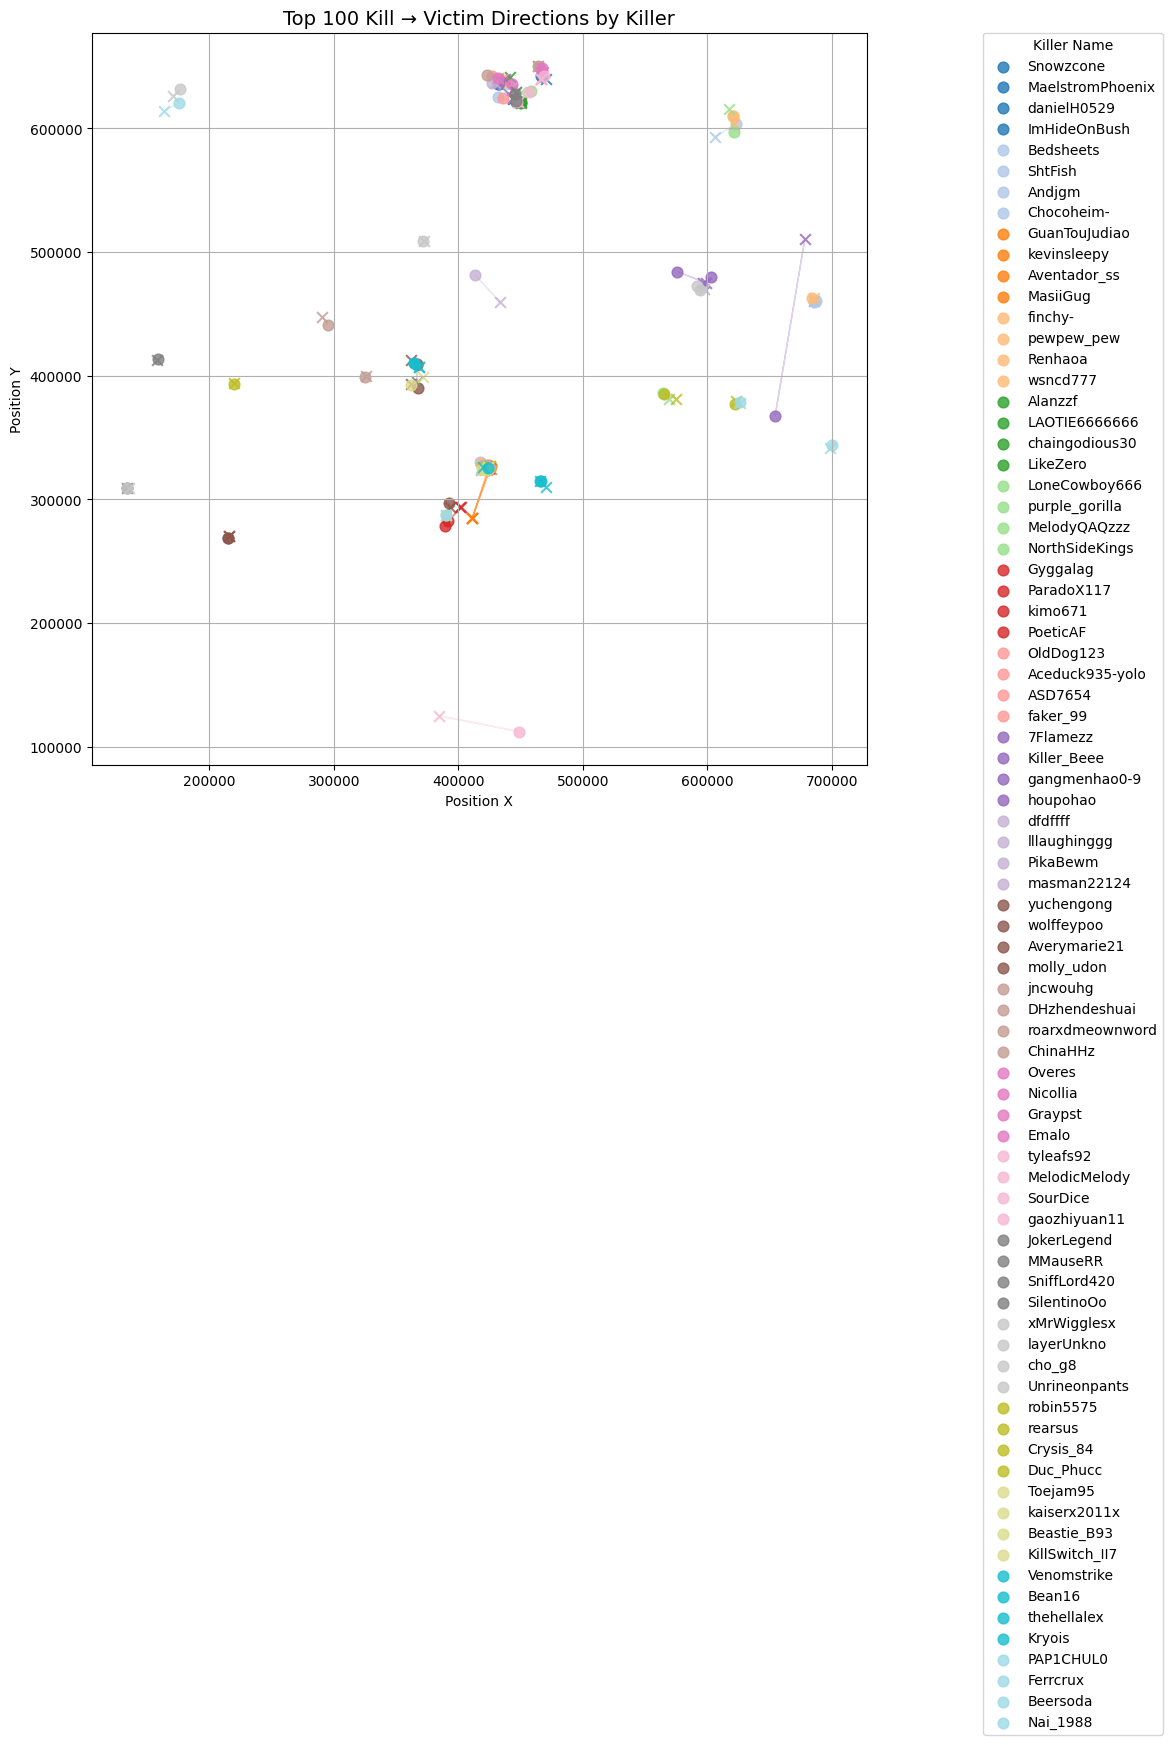

In [19]:
# 지도 정보로 kill 포지션, victim 포지션 시각화 (상위 100행만 진행)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 상위 100개 행만 사용
map1_top100 = map1_combined_label.head(100)

# 고유 killer 리스트
killers = map1_top100['killer_name'].unique()
colors = cm.get_cmap('tab20', len(killers))
color_dict = {killer: colors(i) for i, killer in enumerate(killers)}

# --- x, y 범위 확인
x_min, x_max = map1_top100[['killer_position_x', 'victim_position_x']].min().min(), map1_top100[['killer_position_x', 'victim_position_x']].max().max()
y_min, y_max = map1_top100[['killer_position_y', 'victim_position_y']].min().min(), map1_top100[['killer_position_y', 'victim_position_y']].max().max()

# --- x와 y 범위 비율 계산
x_range = x_max - x_min
y_range = y_max - y_min
aspect_ratio = x_range / y_range

# --- Figure 크기를 비율에 맞게 자동 조정
fig_width = 10
fig_height = fig_width / aspect_ratio if aspect_ratio > 1 else fig_width * aspect_ratio
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# --- 산점도와 화살표 표시
for killer in killers:
    df = map1_top100[map1_top100['killer_name'] == killer]
    color = color_dict[killer]
    
    # 킬 위치 (동그라미)
    ax.scatter(df['killer_position_x'], df['killer_position_y'], c=[color], label=killer, s=60, alpha=0.8, marker='o')
    # 피해 위치 (동그라미)
    ax.scatter(df['victim_position_x'], df['victim_position_y'], c=[color], s=60, alpha=0.8, marker='x')
    
    # 킬→피해 화살표
    for _, row in df.iterrows():
        ax.arrow(
            row['killer_position_x'], row['killer_position_y'],
            row['victim_position_x'] - row['killer_position_x'],
            row['victim_position_y'] - row['killer_position_y'],
            color=color, alpha=0.3, width=0.05, head_width=0.5, length_includes_head=True
        )

ax.set_title('Top 100 Kill → Victim Directions by Killer', fontsize=14)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.grid(True)

# 범례를 오른쪽 밖으로 이동
ax.legend(title='Killer Name', bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)

# 자동 레이아웃
plt.tight_layout()
plt.show()

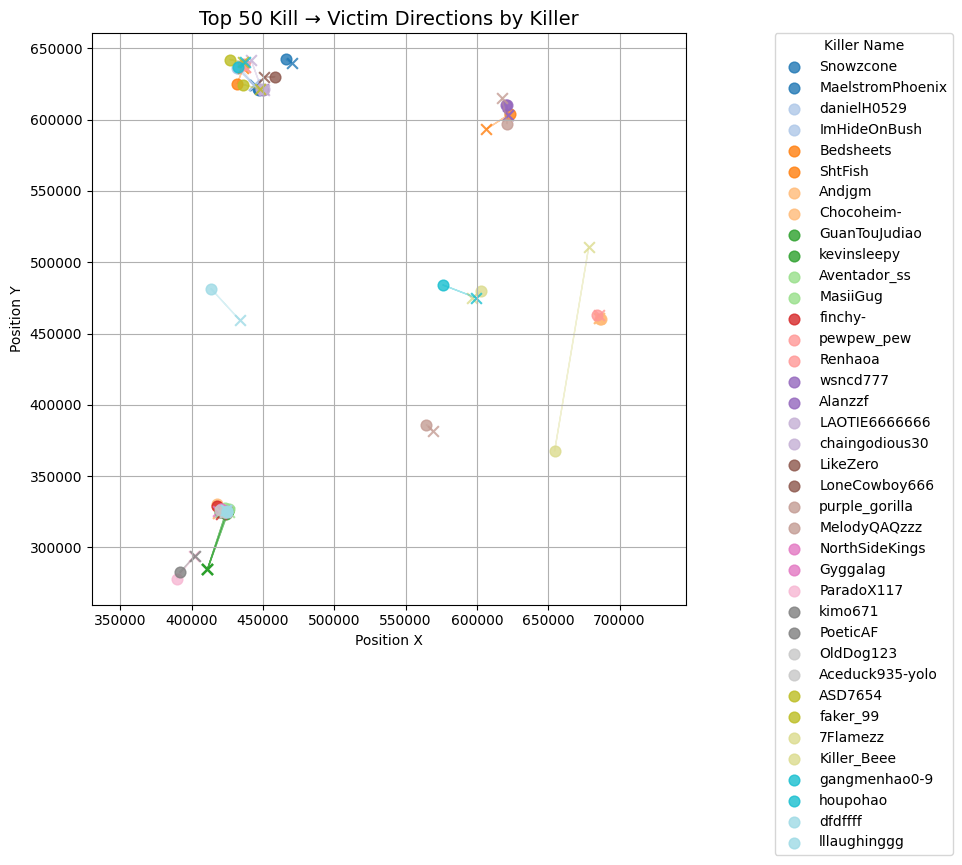

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 상위 50개 행만 사용
map1_top50 = map1_combined_label.head(50)

# 고유 killer 리스트
killers = map1_top50['killer_name'].unique()
colors = cm.get_cmap('tab20', len(killers))
color_dict = {killer: colors(i) for i, killer in enumerate(killers)}

# --- x, y 범위 확인
x_min, x_max = map1_top50[['killer_position_x', 'victim_position_x']].min().min(), map1_top50[['killer_position_x', 'victim_position_x']].max().max()
y_min, y_max = map1_top50[['killer_position_y', 'victim_position_y']].min().min(), map1_top50[['killer_position_y', 'victim_position_y']].max().max()

# --- x와 y 범위 비율 계산
x_range = x_max - x_min
y_range = y_max - y_min
aspect_ratio = x_range / y_range

# --- Figure 크기를 비율에 맞게 자동 조정
fig_width = 10
fig_height = fig_width / aspect_ratio if aspect_ratio > 1 else fig_width * aspect_ratio
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# --- 산점도 및 화살표 표시
for killer in killers:
    df = map1_top50[map1_top50['killer_name'] == killer]
    color = color_dict[killer]
    
    # 킬러 위치
    ax.scatter(df['killer_position_x'], df['killer_position_y'], c=[color], label=killer, s=60, alpha=0.8, marker='o')
    # 피해자 위치
    ax.scatter(df['victim_position_x'], df['victim_position_y'], c=[color], s=60, alpha=0.8, marker='x')
    
    # 킬러→피해자 화살표
    for _, row in df.iterrows():
        ax.arrow(
            row['killer_position_x'], row['killer_position_y'],
            row['victim_position_x'] - row['killer_position_x'],
            row['victim_position_y'] - row['killer_position_y'],
            color=color, alpha=0.4, width=0.05, head_width=0.5, length_includes_head=True
        )

# --- 제목 및 축 설정
ax.set_title('Top 50 Kill → Victim Directions by Killer', fontsize=14)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.grid(True)

# --- 축 비율을 실제 비율로 설정 (왜곡 방지)
ax.set_aspect('equal', adjustable='datalim')

# --- 범례를 오른쪽 바깥으로 이동
ax.legend(title='Killer Name', bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)

# --- 자동 레이아웃
plt.tight_layout()
plt.show()


---
## 7분 내 희생 당한 경우

In [21]:
# 2분30초 이내 kill한 플레이어가 7분 이내에 victim 당한 경우

# 1. 텍스트 파일에서 unique 이름 읽기
with open('map1_unique_killer_names.txt', 'r', encoding='utf-8') as f:
    unique_names = [line.strip() for line in f.readlines()]
# 2. victim_name이 unique_names에 있고, time <= 420인 데이터 추출
map1_kill_data_over40_victimwithin420 = map1_kill_data_over40[
    (map1_kill_data_over40['victim_name'].isin(unique_names)) &
    (map1_kill_data_over40['time'] <= 420)
].copy()  # .copy()로 새로운 데이터프레임 생성
# 결과 확인
print(map1_kill_data_over40_victimwithin420.shape)
display(map1_kill_data_over40_victimwithin420.head())

(4120587, 12)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
185,Down and Out,Snowzcone,44.0,466173.1,642295.2,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,GoochSlapper69,49.0,466214.9,641051.5
198,SCAR-L,DruggyWitHoes,14.0,443493.3,625540.4,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,358,ImHideOnBush,35.0,443663.6,624165.9
200,Tommy Gun,danielH0529,35.0,431516.6,636198.3,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,LIVINTHEPUGLIFE,48.0,433497.2,635122.9
201,Grenade,danielH0529,35.0,443659.8,623592.1,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,MaelstromPhoenix,14.0,444418.6,624538.6
237,AKM,Relugar,22.0,574787.9,381992.4,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,184,peisinidimaye,25.0,573797.7,382727.6


In [22]:
# 희생자 컬럼명 변경 및 정렬 
# map1
# 1. 필요한 컬럼만 선택
cols_to_keep = ['time', 'victim_name', 'victim_placement', 'victim_position_x', 'victim_position_y', 'match_id']
map1_kill_data_over40_victimwithin420_sort = map1_kill_data_over40_victimwithin420[cols_to_keep].copy()
# 2. time 컬럼 이름을 victim_time으로 변경
map1_kill_data_over40_victimwithin420_sort.rename(columns={'time': 'victim_time', 'match_id': 'victim_match_id'}, inplace=True)
# 3. 컬럼 순서 변경
new_order = ['victim_name', 'victim_match_id', 'victim_time', 'victim_placement', 'victim_position_x', 'victim_position_y']
map1_kill_data_over40_victimwithin420_sort = map1_kill_data_over40_victimwithin420_sort[new_order]
# 4. 결과 확인
print(map1_kill_data_over40_victimwithin420_sort.shape)
display(map1_kill_data_over40_victimwithin420_sort.head())

(4120587, 6)


,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
185,GoochSlapper69,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,49.0,466214.9,641051.5
198,ImHideOnBush,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,358,35.0,443663.6,624165.9
200,LIVINTHEPUGLIFE,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,48.0,433497.2,635122.9
201,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,14.0,444418.6,624538.6
237,peisinidimaye,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,184,25.0,573797.7,382727.6


In [23]:
# # 2분30초 내에 kill한 플레이어가 7분 내에 victim 당한 데이터 (병합)
# map1 데이터 병합 + match_id 일치 조건을 동시에 처리
map1_combined_label_2 = pd.merge(
    map1_kill_data_over40_within150_sort,
    map1_kill_data_over40_victimwithin420_sort,
    left_on='killer_name',
    right_on='victim_name',
    how='inner'
).query("kill_match_id == victim_match_id")   # merge 결과에서 match_id 일치 조건 바로 필터링

# 결과 확인
print(map1_combined_label_2.shape)
display(map1_combined_label_2.head())

# CSV 파일로 저장
map1_combined_label_2.to_csv('map1_combined_label_2.csv', index=False, encoding='utf-8-sig')

(762018, 12)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
0,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,44.0,466173.1,642295.2,Snowzcone,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,155,44.0,470070.9,639671.6
21,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,105,14.0,446553.8,621515.8,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,14.0,444418.6,624538.6
261,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,89,35.0,431516.6,636198.3,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,357,35.0,443665.2,624530.9
355,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,114,35.0,433063.9,637233.8,danielH0529,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,357,35.0,443665.2,624530.9
380,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,120,14.0,447412.9,621057.6,MaelstromPhoenix,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,354,14.0,444418.6,624538.6


In [ ]:
# 여러 명 kill한 경우, 첫 번째 kill한 데이터만 필터링
# 각 killer_name + kill_match_id 그룹에서 kill_time이 가장 빠른 행만 남기기
map1_combined_label_2_fastest = map1_combined_label_2.loc[
    map1_combined_label_2.groupby(['killer_name', 'kill_match_id'])['kill_time'].idxmin()
].reset_index(drop=True)

# 결과 확인
print(map1_combined_label_2_fastest.shape)
display(map1_combined_label_2_fastest.head())

# CSV로 저장
map1_combined_label_2_fastest.to_csv('map1_combined_label_2_fastest.csv', index=False, encoding='utf-8-sig')

(614089, 12)


,killer_name,kill_match_id,kill_time,killer_placement,killer_position_x,killer_position_y,victim_name,victim_match_id,victim_time,victim_placement,victim_position_x,victim_position_y
0,0--kxxk--0,2U4GBNA0YmkSkbm_MM2KpEkTPMLZE5ie4TG0KSSJl0g_ss...,143,17.0,199213.8,292095.2,0--kxxk--0,2U4GBNA0YmkSkbm_MM2KpEkTPMLZE5ie4TG0KSSJl0g_ss...,172,17.0,198047.9,291476.7
1,0--kxxk--0,2U4GBNA0YmlcfvHF-KQ-8ML9Ph_9a90b2CoUjq_xoSg8Ly...,111,26.0,358682.8,298949.7,0--kxxk--0,2U4GBNA0YmlcfvHF-KQ-8ML9Ph_9a90b2CoUjq_xoSg8Ly...,231,26.0,346836.5,312080.0
2,0--kxxk--0,2U4GBNA0YmmuFD0U4KsglFu3kYnGvTDiiBptwSyMI7E-hH...,109,25.0,0.0,0.0,0--kxxk--0,2U4GBNA0YmmuFD0U4KsglFu3kYnGvTDiiBptwSyMI7E-hH...,98,25.0,432471.4,635862.7
3,0-0-Bram,2U4GBNA0Ymn8QzN9rOieAM0R6GHaNkXxzc2RZg7H3HtdUD...,106,39.0,391272.6,346693.7,0-0-Bram,2U4GBNA0Ymn8QzN9rOieAM0R6GHaNkXxzc2RZg7H3HtdUD...,146,39.0,393143.1,348960.9
4,0-0PenGzF,2U4GBNA0YmnQ8d7td5y8WK92CBaDYpwVLPMGqTkaKYm1mm...,99,42.0,421163.2,324833.1,0-0PenGzF,2U4GBNA0YmnQ8d7td5y8WK92CBaDYpwVLPMGqTkaKYm1mm...,138,42.0,421411.3,325029.4


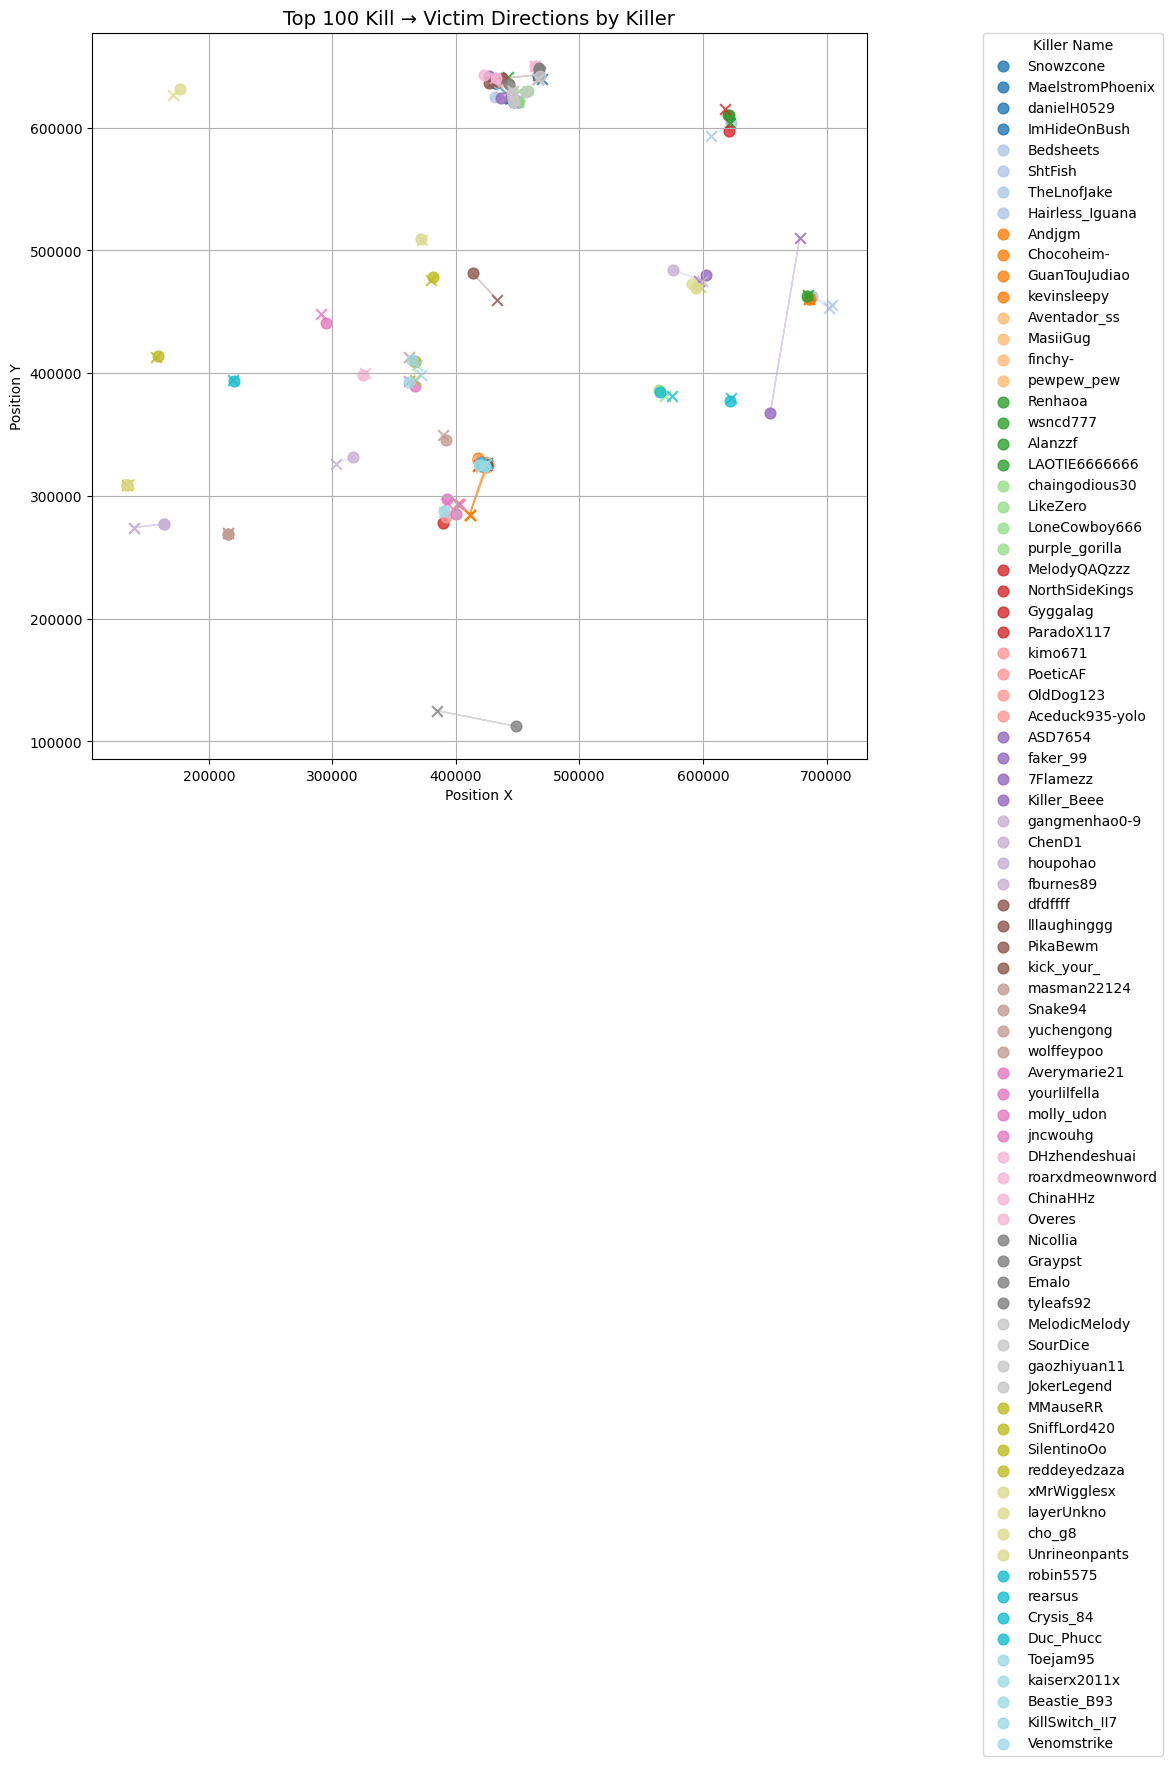

In [27]:
# 지도 정보로 kill 포지션, victim 포지션 시각화 (상위 100행만 진행)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 상위 100개 행만 사용
map1_top100 = map1_combined_label_2.head(100)

# 고유 killer 리스트
killers = map1_top100['killer_name'].unique()
colors = cm.get_cmap('tab20', len(killers))
color_dict = {killer: colors(i) for i, killer in enumerate(killers)}

# --- x, y 범위 확인
x_min, x_max = map1_top100[['killer_position_x', 'victim_position_x']].min().min(), map1_top100[['killer_position_x', 'victim_position_x']].max().max()
y_min, y_max = map1_top100[['killer_position_y', 'victim_position_y']].min().min(), map1_top100[['killer_position_y', 'victim_position_y']].max().max()

# --- x와 y 범위 비율 계산
x_range = x_max - x_min
y_range = y_max - y_min
aspect_ratio = x_range / y_range

# --- Figure 크기를 비율에 맞게 자동 조정
fig_width = 10
fig_height = fig_width / aspect_ratio if aspect_ratio > 1 else fig_width * aspect_ratio
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# --- 산점도와 화살표 표시
for killer in killers:
    df = map1_top100[map1_top100['killer_name'] == killer]
    color = color_dict[killer]
    
    # 킬 위치 (동그라미)
    ax.scatter(df['killer_position_x'], df['killer_position_y'], c=[color], label=killer, s=60, alpha=0.8, marker='o')
    # 피해 위치 (동그라미)
    ax.scatter(df['victim_position_x'], df['victim_position_y'], c=[color], s=60, alpha=0.8, marker='x')
    
    # 킬→피해 화살표
    for _, row in df.iterrows():
        ax.arrow(
            row['killer_position_x'], row['killer_position_y'],
            row['victim_position_x'] - row['killer_position_x'],
            row['victim_position_y'] - row['killer_position_y'],
            color=color, alpha=0.3, width=0.05, head_width=0.5, length_includes_head=True
        )

ax.set_title('Top 100 Kill → Victim Directions by Killer', fontsize=14)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.grid(True)

# 범례를 오른쪽 밖으로 이동
ax.legend(title='Killer Name', bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)

# 자동 레이아웃
plt.tight_layout()
plt.show()